Example use case of pandas dataframes.

In [256]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('future.no_silent_downcasting', True)

#read in the dataframe for the file
df = pd.read_csv("laser_data.csv", sep=',', engine='python')

df

,Time_I,Intensity,Time_L,Laser,Time_V,Vert_Emit,Time_H,Horz_Emit,Time_C,Linac_Current
0,Wed Feb 24 09:20:01.563,-0.024943352,Wed Feb 24 09:20:11.041,88,Wed Feb 24 09:20:02.885,0,Wed Feb 24 09:20:02.885,0,Wed Feb 24 09:20:01.523,-0.003038
1,Wed Feb 24 09:20:03.963,-0.024943352,Wed Feb 24 09:20:26.042,88,Wed Feb 24 09:20:12.886,0,Wed Feb 24 09:20:12.886,0,Wed Feb 24 09:20:03.923,-0.003038
2,Wed Feb 24 09:20:08.963,-0.024943352,Wed Feb 24 09:20:41.042,88,Wed Feb 24 09:20:22.886,0,Wed Feb 24 09:20:22.886,0,Wed Feb 24 09:20:08.923,-0.003038
3,Wed Feb 24 09:20:11.564,-0.024943352,Wed Feb 24 09:20:56.043,88,Wed Feb 24 09:20:28.288,15.05932903,Wed Feb 24 09:20:28.288,13.62533474,Wed Feb 24 09:20:11.524,-0.003038
4,Wed Feb 24 09:20:13.964,-0.019954681,Wed Feb 24 09:21:11.042,88,Wed Feb 24 09:20:32.886,15.08016491,Wed Feb 24 09:20:32.886,13.5490551,Wed Feb 24 09:20:13.924,-0.003038
...,...,...,...,...,...,...,...,...,...,...
745,,,,,,,,,Wed Feb 24 09:44:48.947,21.126510
746,,,,,,,,,Wed Feb 24 09:44:49.014,21.500135
747,,,,,,,,,Wed Feb 24 09:44:51.546,21.351292
748,,,,,,,,,Wed Feb 24 09:44:53.946,21.652015


In [257]:
#divide the datafram into pairs of columns.
df_1 = df[['Time_I','Intensity']]
df_2 = df[['Time_L','Laser']]
df_3 = df[['Time_V','Vert_Emit']]
df_4 = df[['Time_H','Horz_Emit']]
df_5 = df[['Time_C','Linac_Current']]

print(df_1)

                      Time_I          Intensity
0    Wed Feb 24 09:20:01.563       -0.024943352
1    Wed Feb 24 09:20:03.963       -0.024943352
2    Wed Feb 24 09:20:08.963       -0.024943352
3    Wed Feb 24 09:20:11.564       -0.024943352
4    Wed Feb 24 09:20:13.964       -0.019954681
..                       ...                ...
745                                            
746                                            
747                                            
748                                            
749                                            

[750 rows x 2 columns]


Eliminate the rows that are just blank spaces.

In [258]:
#Method 1 of cleaning data
df_1.loc[:, 'Time_I'] = df_1['Time_I'].replace('\s+\s', None, regex=True)
df_1.loc[:, 'Intensity'] = df_1['Intensity'].replace('\s+\s', None, regex=True)
df_1 = df_1.dropna()

#Method 2 of cleaning data
dex = df_2[df_2['Time_L'].str.contains('\s+\s', regex=True)].index[0]
df_2 = df_2.iloc[:dex]

#Method 2, one line
df_3 = df_3.iloc[:df_3[df_3['Time_V'].str.contains('\s+\s', regex=True)].index[0]]
df_4 = df_4.iloc[:df_4[df_4['Time_H'].str.contains('\s+\s', regex=True)].index[0]]

#df_5 doesn't need cleaning actually


Cast data as correct types, specific timestamp format

In [259]:
print(df_1.dtypes)

df_1.loc[:, 'Time_I'] = pd.to_datetime(df_1['Time_I'], format='%a %b %d %H:%M:%S.%f')
df_1.loc[:, 'Intensity'] = df_1['Intensity'].astype(float)
df_2.loc[:, 'Time_L'] = pd.to_datetime(df_2['Time_L'], format='%a %b %d %H:%M:%S.%f')
df_2.loc[:, 'Laser'] = df_2['Laser'].astype(int)
df_3.loc[:, 'Time_V'] = pd.to_datetime(df_3['Time_V'], format='%a %b %d %H:%M:%S.%f')
df_3.loc[:, 'Vert_Emit'] = df_3['Vert_Emit'].astype(float)
df_4.loc[:, 'Time_H'] = pd.to_datetime(df_4['Time_H'], format='%a %b %d %H:%M:%S.%f')
df_4.loc[:, 'Horz_Emit'] = df_4['Horz_Emit'].astype(float)
df_5.loc[:, 'Time_C'] = pd.to_datetime(df_5['Time_C'], format='%a %b %d %H:%M:%S.%f')
df_5.loc[:, 'Linac_Current'] = df_5['Linac_Current'].astype(float)

print(df_1)
print(df_1.dtypes)

Time_I       object
Intensity    object
dtype: object
                         Time_I Intensity
0    1900-02-24 09:20:01.563000 -0.024943
1    1900-02-24 09:20:03.963000 -0.024943
2    1900-02-24 09:20:08.963000 -0.024943
3    1900-02-24 09:20:11.564000 -0.024943
4    1900-02-24 09:20:13.964000 -0.019955
..                          ...       ...
734  1900-02-24 09:44:48.987000  3.801367
735  1900-02-24 09:44:49.054000  3.921095
736  1900-02-24 09:44:51.586000  3.891163
737  1900-02-24 09:44:53.986000   3.90114
738  1900-02-24 09:44:58.984000  3.906129

[739 rows x 2 columns]
Time_I       object
Intensity    object
dtype: object


Set index to timestable, and Resample data at 10s intervals

In [260]:
print(df_1.set_index('Time_I'))

df_1s = df_1.set_index('Time_I').resample('10s').max()
df_2s = df_2.set_index('Time_L').resample('10s', origin=df_1.first_valid_index()).bfill()
df_3s = df_3.set_index('Time_V').resample('10s', origin=df_1.first_valid_index()).max()
df_4s = df_4.set_index('Time_H').resample('10s', origin=df_1.first_valid_index()).max()
df_5s = df_5.set_index('Time_C').resample('10s', origin=df_1.first_valid_index()).max()

print(df_1s)

                        Intensity
Time_I                           
1900-02-24 09:20:01.563 -0.024943
1900-02-24 09:20:03.963 -0.024943
1900-02-24 09:20:08.963 -0.024943
1900-02-24 09:20:11.564 -0.024943
1900-02-24 09:20:13.964 -0.019955
...                           ...
1900-02-24 09:44:48.987  3.801367
1900-02-24 09:44:49.054  3.921095
1900-02-24 09:44:51.586  3.891163
1900-02-24 09:44:53.986   3.90114
1900-02-24 09:44:58.984  3.906129

[739 rows x 1 columns]
                    Intensity
Time_I                       
1900-02-24 09:20:00 -0.024943
1900-02-24 09:20:10 -0.019955
1900-02-24 09:20:20  4.444905
1900-02-24 09:20:30  4.484815
1900-02-24 09:20:40  4.469849
...                       ...
1900-02-24 09:44:10  3.886174
1900-02-24 09:44:20  3.965993
1900-02-24 09:44:30  3.951027
1900-02-24 09:44:40  3.936061
1900-02-24 09:44:50  3.906129

[150 rows x 1 columns]


C:\Users\Jeff\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
C:\Users\Jeff\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


Merge dataset so it shares a common dataset

In [261]:
df_m = pd.merge(df_1s, df_2s, how='left', left_index=True, right_index=True)
df_m = pd.merge(df_m, df_3s, how='left', left_index=True, right_index=True)
df_m = pd.merge(df_m, df_4s, how='left', left_index=True, right_index=True)
df_m = pd.merge(df_m, df_5s, how='left', left_index=True, right_index=True)

df_m

,Intensity,Laser,Vert_Emit,Horz_Emit,Linac_Current
Time_I,,,,,
1900-02-24 09:20:00,-0.024943,NaN,0.0,0.0,-0.003038
1900-02-24 09:20:10,-0.019955,88,0.0,0.0,-0.003038
1900-02-24 09:20:20,4.444905,88,15.059329,13.625335,21.688466
1900-02-24 09:20:30,4.484815,88,15.080165,13.549055,21.648977
1900-02-24 09:20:40,4.469849,88,15.322577,13.71168,21.627714
...,...,...,...,...,...
1900-02-24 09:44:10,3.886174,88,13.165428,12.561517,21.679353
1900-02-24 09:44:20,3.965993,88,13.273826,12.185929,21.727955
1900-02-24 09:44:30,3.951027,88,13.162666,12.517281,21.515323


In [262]:
#Backfill sparse data, and filter data by operating conditions
df_m['Laser'] = df_m['Laser'].ffill()
df_mf = df_m.query('Intensity > 1').query('Linac_Current > 5').query('Vert_Emit > 5')
df_mf['Laser'] = (df_mf['Laser'].astype(int)-88)

print(df_mf)

                    Intensity  Laser  Vert_Emit  Horz_Emit  Linac_Current
Time_I                                                                   
1900-02-24 09:20:20  4.444905      0  15.059329  13.625335      21.688466
1900-02-24 09:20:30  4.484815      0  15.080165  13.549055      21.648977
1900-02-24 09:20:40  4.469849      0  15.322577   13.71168      21.627714
1900-02-24 09:20:50  4.454883      0  15.345113  13.663933      21.655052
1900-02-24 09:21:00  4.385041      0  15.019257  14.158805      21.381668
...                       ...    ...        ...        ...            ...
1900-02-24 09:44:10  3.886174      0  13.165428  12.561517      21.679353
1900-02-24 09:44:20  3.965993      0  13.273826  12.185929      21.727955
1900-02-24 09:44:30  3.951027      0  13.162666  12.517281      21.515323
1900-02-24 09:44:40  3.936061      0  13.147929  12.545254      21.500135
1900-02-24 09:44:50  3.906129      0  13.196263   12.56574      21.652015

[146 rows x 5 columns]


Now that we correlated the data, we can plot it

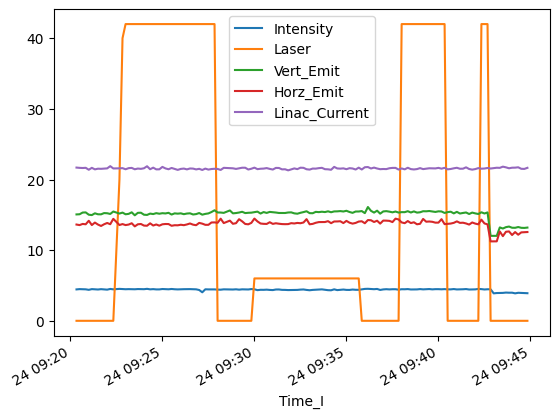

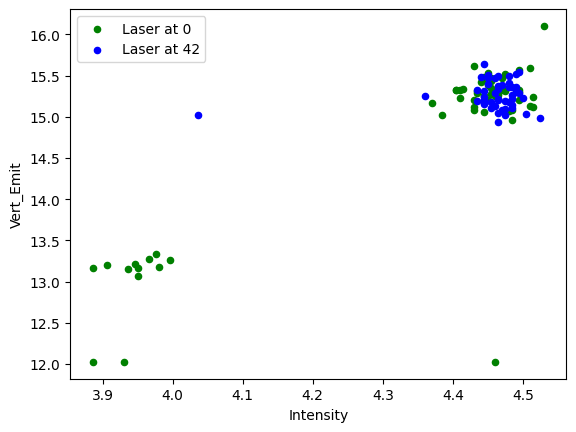

In [263]:
#Plot time series of experiment variables
df_mf.plot()
plt.show()

#plot scatterplot comparing data at different laser conditions
ax = df_mf.query('Laser == 0').plot(kind='scatter', color='green', x='Intensity',y='Vert_Emit')
df_mf.query('Laser == 42').plot(kind='scatter', color='blue', x='Intensity',y='Vert_Emit', ax=ax)
ax.legend(["Laser at 0","Laser at 42"])
plt.show()

Statistical Test of "6" and "42" laser conditions versus "0"

In [264]:
#Find mean and standard deviation by Laser condition.
df_pivot = pd.pivot_table(df_mf, index=['Laser'], aggfunc=['mean','std']).dropna()

df_pivot

mean                                          std            \
       Horz_Emit Intensity Linac_Current  Vert_Emit Horz_Emit Intensity   
Laser                                                                     
0      13.542235  4.354864     21.581751  14.803825  0.800823  0.208477   
6      13.898023  4.388177     21.533375  15.369932  0.192760  0.036820   
42     13.751637  4.457585     21.537155  15.265614  0.240414  0.067088   

                               
      Linac_Current Vert_Emit  
Laser                          
0          0.111080  1.025392  
6          0.106713  0.106344  
42         0.101553  0.166841

In [265]:
#Find z values (statistically significance), of difference with respect to 0.
df_z = (df_pivot['mean']- df_pivot['mean'].loc[0]) / np.sqrt( df_pivot['std']**2 + df_pivot['std'].loc[0]**2 )
df_z = df_z.loc[[6,42]]

df_z


,Horz_Emit,Intensity,Linac_Current,Vert_Emit
Laser,,,,
6,0.431941,0.157357,-0.314065,0.549144
42,0.250441,0.469033,-0.29631,0.444508
